In [1]:

import sqlite3
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
class Moons:
    def __init__(self,connection ='data/JUPITER.db'):
        self.connection = connection
        self.connect = sqlite3.connect(self.connection)
        
    def dataFrame(self, query='SELECT * FROM moons'):
        self.data = pd.read_sql_query(query, self.connect)
        
    def show(self):
        print(self.data)
        
    def choose_moon(self):
        x = input('enter name of the moon you will like to view? ')
        return self.data[self.data['moon'] == x]
    def summary(self):
            return print(self.data.describe())
        
    def mass_raw(self):
        sns.stripplot(data=self.data, x="mass_kg", hue ='group' ,jitter=False, s=25, marker="D", linewidth=1)
        plt.title('Mass of moons raw data')
        plt.show()
        
    def mass_predicted(self):
        self.data['mag'] = self.data['mag'].fillna(self.data['mag'].mean())
        test = self.data.dropna(inplace=False).copy()
        train = self.data[self.data['mass_kg'].isnull()].copy()
        X = np.asarray(test.drop(['mass_kg', 'moon','group'], axis=1))
        Y = np.asarray(test['mass_kg'])
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=40)
        lr = LinearRegression()
        lr.fit(x_train, y_train)
        x_test= np.asarray(train.drop(['mass_kg', 'moon','group'], axis=1))
        mass_pred = lr.predict(x_test)
        train.loc[pd.isnull(train['mass_kg']), 'mass_kg'] = mass_pred
        mass_data = [test, train]
        predicted= pd.concat(mass_data)
        sns.stripplot(data=predicted, x="mass_kg", jitter=False, hue = 'group', s=25, marker="D", linewidth=1, alpha=0.8)
        plt.title('mass of moon /kg')
        plt.show()
        sns.scatterplot(data=predicted, x="mass_kg", y="distance_km", hue="group", marker= "+")
        plt.title('mass of moon /kg')
        plt.show()
        
    
        
    def heatmap(self):
        correlation = self.data.corr()
        sns.heatmap(correlation, annot = True, linewidth = 0.4, cmap = 'summer')
        plt.title('heatmap')
        plt.show()

    def plots_mag_vs_distance(self):
        self.data['mag'] = self.data['mag'].fillna(self.data['mag'].mean())
        variable_used = [ 'mag', 'distance_km']
        plot = sns.PairGrid(self.data, hue = 'group', vars=variable_used)
        plot.map_diag(sns.histplot, color = 'darkblue', alpha = 0.7, edgecolor = 'none', hue = None)
        plot.map_offdiag(sns.scatterplot, marker = '+')
        plot.add_legend()
        
    def plots_days_vs_ecc(self):
        variable_used = [ 'period_days', 'ecc']
        plot = sns.PairGrid(self.data, hue = 'group', vars=variable_used)
        plot.map_diag(sns.histplot, color= 'blueviolet' , hue = None ,edgecolor = 'none')
        plot.map_offdiag(sns.scatterplot, marker = 'd')
        plot.add_legend()
    
    def plots_deg_vs_ecc(self):
        variable_used = [ 'inclination_deg', 'ecc']
        plot = sns.PairGrid(self.data, hue = 'group', vars=variable_used)
        plot.map_diag(sns.histplot, color = 'peru', edgecolor = 'none', hue = None )
        plot.map_offdiag(sns.scatterplot, marker = 'v')
        plot.add_legend() 
    
    def plots_radius_vs_distance(self):
        self.data=self.data[self.data['radius_km'] <= 40]
        variable_used = [ 'distance_km', 'radius_km']
        plot = sns.PairGrid(self.data, hue = 'group',diag_sharey=False, vars=variable_used)
        plot.map_offdiag(sns.scatterplot, marker = 'v')
        plot.map_diag(sns.histplot, color ='rebeccapurple', alpha=0.7, hue = None, edgecolor = 'none')
        plot.add_legend()
    
        
    def circumference(self):
        moon = input('type name of moon')
        moon2 = input('type name of different moon')
        r= int(self.data.loc[self.data['moon'] == moon]['radius_km'])
        r2= int(self.data.loc[self.data['moon'] == moon2]['radius_km'])
        
        a= np.linspace( 0 , 2*np.pi , 180 ) 
        x = r * np.cos( a ) 
        y = r * np.sin( a ) 
        x1 = r2* np.cos( a ) 
        y1 = r2 * np.sin( a ) 

        figure, axes = plt.subplots( 1 ) 
 
        axes.plot( x, y, label = moon ) 
        axes.plot( x1, y1, label = moon2 ) 
    
        plt.title( 'Comparing circumferences of each Moon / km' ) 
        plt.legend()
        return plt.show() 
          
    def jupiter_mass(self):
        self.data['T_squared']=(self.data['period_days']*86400)**2
        self.data['A_cubed']=((self.data['distance_km'])*1000)**3
        a_cube = self.data['A_cubed']
        t_square = self.data['T_squared']
        X_train, X_test, y_train, y_test = train_test_split(a_cube, t_square)
        X_train = X_train.values.reshape([-1, 1])
        X_test = X_test.values.reshape([-1, 1])
        model = linear_model.LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        G =(6.67)*(10**(-11))
        pi = np.pi
        constant = ((4 )*(pi**2) )
        Jupiter_mass = constant/(model.coef_[0]*G)
        print(f"unweighted model r2_score: {r2_score(y_test,y_pred)}")
        print(f"mass of Jupiter in kg:{Jupiter_mass}")
        


    
jupiter_moon_info = Moons()
jupiter_moon_info.dataFrame()


In [2]:
jupiter_moon_info.show()

             moon  period_days  distance_km  radius_km    mag       mass_kg  \
0        Adrastea     0.298000     129000.0       8.20    NaN           NaN   
1           Aitne   730.000000   23231000.0       1.50  22.70           NaN   
2        Amalthea     0.498000     181400.0      83.50  14.10  2.080000e+18   
3          Ananke   630.000000   21300000.0      14.00  18.90           NaN   
4           Aoede   761.000000   24000000.0       2.00  22.50           NaN   
5           Arche   724.000000   22931000.0       1.50  22.80           NaN   
6         Autonoe   719.000000   23039000.0       2.00  22.00           NaN   
7      Callirrhoe   787.000000   24583090.0       4.80  20.80           NaN   
8        Callisto    16.689018    1882700.0    2410.30   5.65  1.075938e+23   
9           Carme   693.000000   22579850.0      23.35  18.90           NaN   
10          Carpo   456.000000   16989000.0       1.50  23.00           NaN   
11       Chaldene   760.000000   24006280.0       2.

the code above shows the dataset of Jupiter moons. This dataset provides the names, inclincation, degree, mass, ecc, group, radius and 
distance from jupiter, plus the group

In [3]:
jupiter_moon_info.choose_moon()

enter name of the moon you will like to view? Dia


,moon,period_days,distance_km,radius_km,mag,mass_kg,group,ecc,inclination_deg
13,Dia,287.0,12118000.0,2.0,22.4,NaN,Himalia,0.211,28.3


the code above allows you to select the moon via input function. This shows the characteristics of chosen moon. an input
function was selected to choose within this section of the class as it is simple to run.

In [4]:
jupiter_moon_info.summary()

       period_days   distance_km    radius_km        mag       mass_kg  \
count    56.000000  5.600000e+01    56.000000  53.000000  6.000000e+00   
mean    525.998146  1.775655e+07   158.969643  20.418302  6.551798e+22   
std     272.670243  8.253688e+06   557.730632   4.926587  6.010469e+22   
min       0.290000  1.280000e+05     1.000000   4.610000  2.080000e+18   
25%     258.750000  1.170252e+07     1.500000  20.800000  1.200276e+22   
50%     632.500000  2.129009e+07     2.000000  22.500000  6.865891e+22   
75%     725.500000  2.336375e+07    11.562500  23.000000  1.030252e+23   
max     787.000000  2.458309e+07  2634.100000  23.700000  1.481900e+23   

             ecc  inclination_deg  
count  56.000000        56.000000  
mean    0.222922       113.571607  
std     0.126899        64.562822  
min     0.000200         0.030000  
25%     0.159201        30.582500  
50%     0.228000       148.600000  
75%     0.298858       159.175000  
max     0.611016       166.200000  


The code above shows the general statistic summary of the ecc, periods, distance from Jupiter, radius,
magnitude mass in kg and inclinication degree

In [ ]:
jupiter_moon_info.circumference()

The code above allows the you to choose two moons and compare the circumference. this gives a visual representation
of the size difference

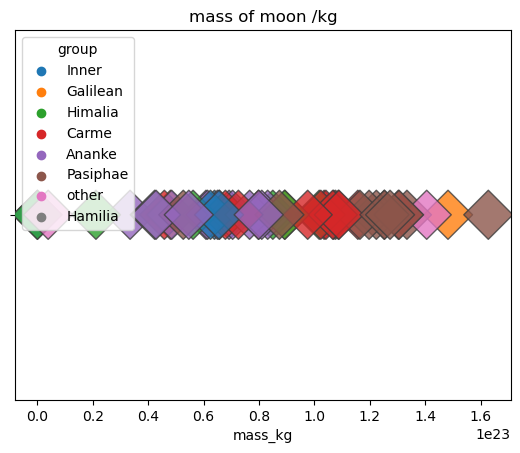

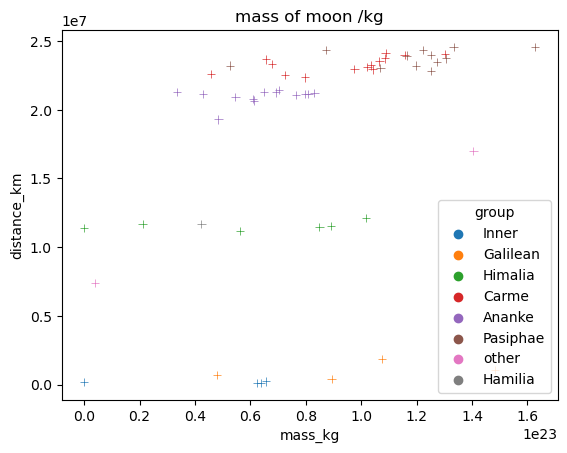

In [81]:
jupiter_moon_info.mass_predicted()

Using linear regression, the mass of each moon was predicted and a scatter boxplot was produce and a graph plotting distance against 
mass kg. the moons in the same group tend to cluster within the same mass region. Himalia however is the most spread in the range
Kdeplot can be used to show more trends too. Each group almost form a line away from Jupiter, the closer the group is to jupiter
the greater the range in mass

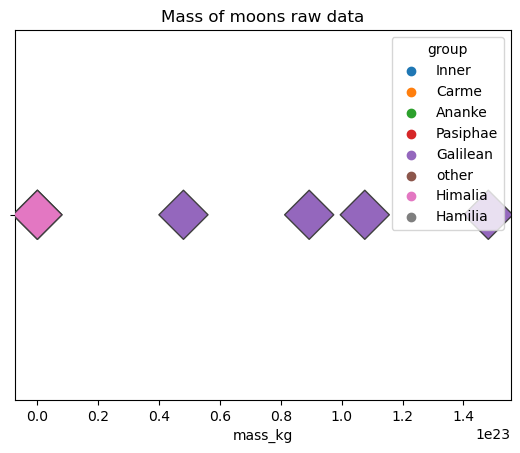

In [82]:
jupiter_moon_info.mass_raw()

this scatter boxplot shows the raw mass values for a few of jupiter's moons the range is similiar to the predicted mass range.
the data from the other columns were used for the linear regression, as the magnitude column had missing values it was filled
using the mean. This meant that some predicted masses maybe inaccurate. Other fillna methods could be suggested as well.

/tmp/ipykernel_185/3090499245.py:59: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = self.data.corr()


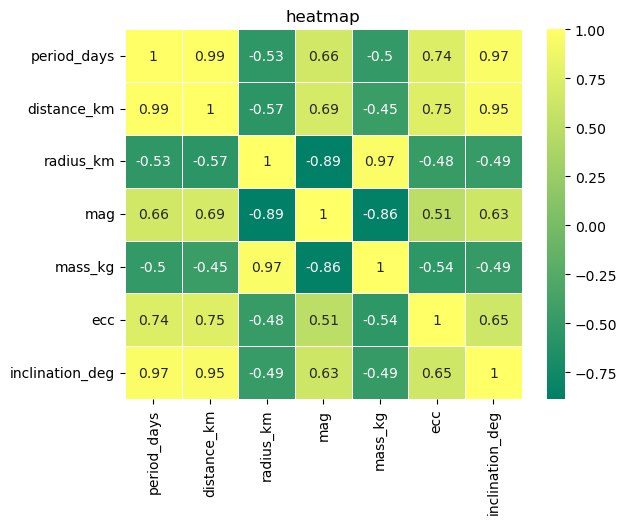

In [83]:
jupiter_moon_info.heatmap()

the code above shows a heatmap of the correlation between two factors. the mass correlation values are from the raw data. 
a possible suggestion is that the correlation can be compared using the predicted mass. heatmap can be adjusted to use different
themes for cmap. this method was chosen as it is a great way to visualise data

In [84]:
jupiter_moon_info.jupiter_mass()

unweighted model r2_score: 0.9922150480259091
mass of Jupiter in kg:1.9198194330367348e+27


Linear regression was again used to predict the mass of Jupiter. The values are similiar to the actual mass. the formula T^2
=(4π^2/GM)a^3 was used to calculate the mass the actual mass of jupiter is 1.8987×10^27. the predicted values is quite similar at 
around 1.926×10^27 kg the r2 value is close to 1 so the prediction is reliable

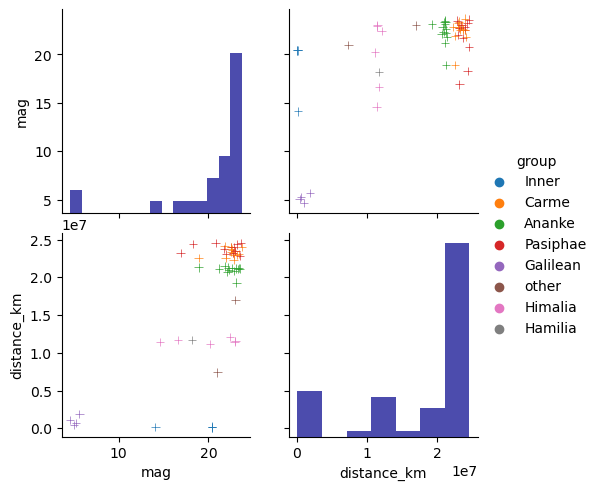

In [85]:
jupiter_moon_info.plots_mag_vs_distance()

The plots shows the relationships between groups, magnitude and distance. Distance and magnitude has a postive relationship
both histograms are skewed left. Pasiphae has the greateast magnitude and distance and groups tend to cluster in the same area
on the plot. The code is adjustable to edit to use different plots like kdeplot or lineplot. Scatterplots and Histograms were used
as it is easy to interprated

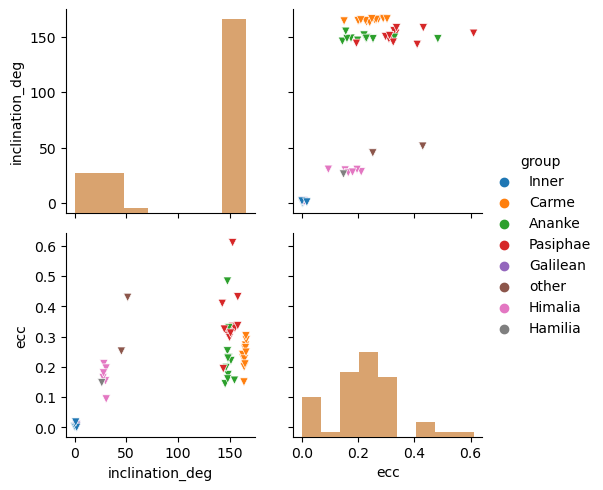

In [86]:
jupiter_moon_info.plots_deg_vs_ecc()

the plot table code comparing the relationship between ecc, group and inclination degree is shown above. 
.Ecc had a bell shape distribution and Inclination degree was bimodal for histagram.Ecc v inclination showed a weak postive trend and Inclination v ecc showed no trend
groups form clusters with pasiphae having the greatest data spread between ecc and inclination degree.

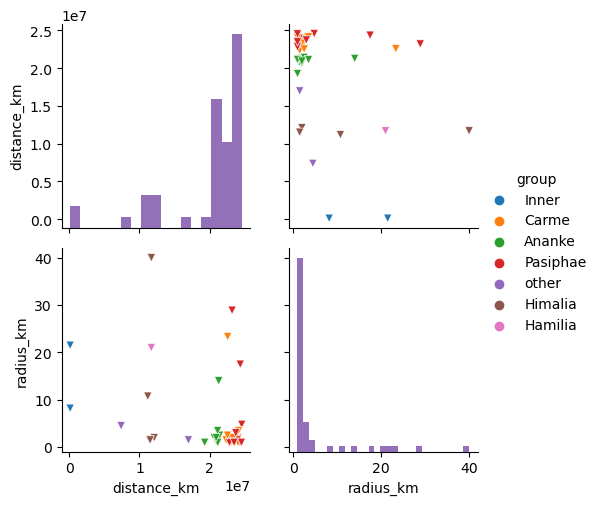

In [87]:
jupiter_moon_info.plots_radius_vs_distance()

any radius greater than 40 km was removed from the data to create the plots to visualise the trends better. the scatter plots show
no correlation between distance and Radius. The radius histograph was skewed right but the distance histagraph was skewed left.
Groups data is rather spread out, with only Carme Ananke and Pasiphae forming distinct clusters at the bottom right of 
radius vs distance graph

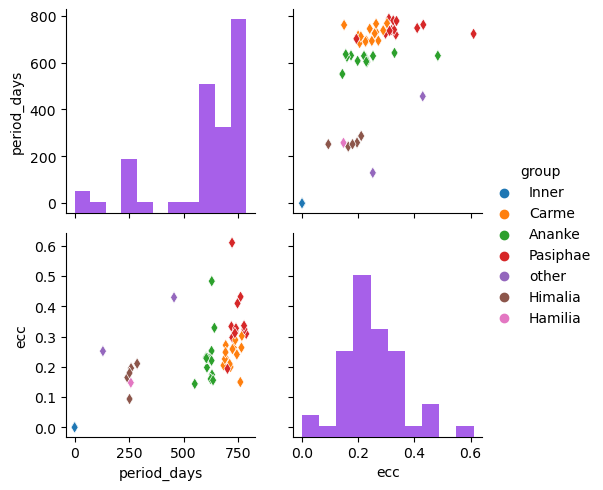

In [88]:
jupiter_moon_info.plots_days_vs_ecc()

the period days histogram was skewed left and the ecc histogram was bell-shaped. ecc vs period days show a postive correlation between
. Moons form clusters based on their groups,